# **Road Sign Image Classification**

This project aims to build a multi-class image classification system capable of identifying different types of road traffic signs from images. Road sign recognition is an important component of driver assistance systems and autonomous vehicles. The types are following:
* Airport ahead sign
* Fuel station sign
* Hospital zone sign
* No entry sign
* No horn sign
* No overtaking sign
* No parking sign
* Railway crossing sign
* Roundabaout sign
* Speed limit sign

# Setting Up Necessary Things

In [ ]:
%matplotlib inline
bs = 32 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00


In [ ]:
from fastai import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/mastercourse/road_sign_classification

/content/drive/MyDrive/mastercourse/road_sign_classification


# Download Images from Browser

You can download images from Google Image Search and Bing Image Search. You can try it out in your own time. You might need to build a scraper or use their API. <br/>

For ease, we are going to use **DuckDuckGo Image Search**. <br/>

**Good news!** Fastai has a function to do this for us.

In [ ]:
road_sign_labels = [
    "stop sign",
    "speed limit sign",
    "no entry sign",
    "no parking sign",
    "no horn sign",
    "road work sign",
    "roundabout ahead sign",
    "railway crossing sign",
    "traffic signal ahead sign",
    "no overtaking sign"
]


queries = {

    "stop sign": [
        "stop sign road photo",
        "stop sign traffic road",
        "stop sign street real"
    ],

    "speed limit sign": [
        "speed limit sign road photo",
        "speed limit traffic sign street",
        "speed limit sign highway"
    ],

    "no entry sign": [
        "no entry sign road photo",
        "no entry traffic sign street",
        "do not enter sign road"
    ],

    "no parking sign": [
        "no parking sign road photo",
        "no parking traffic sign street",
        "no parking sign urban road"
    ],

    "no horn sign": [
        "no horn traffic sign road",
        "no honking sign street",
        "silence zone no horn sign road"
    ],

    "road work sign": [
        "road work traffic sign road",
        "construction ahead sign street",
        "men at work sign traffic road"
    ],

    "roundabout ahead sign": [
        "roundabout ahead traffic sign road",
        "roundabout warning sign street",
        "roundabout sign road photo"
    ],

    "railway crossing sign": [
        "railway crossing traffic sign road",
        "train crossing sign street",
        "railroad crossing warning sign road"
    ],

    "traffic signal ahead sign": [
        "traffic signal ahead sign road",
        "traffic light ahead warning sign street",
        "signal ahead traffic sign road"
    ],

    "no overtaking sign": [
        "no overtaking traffic sign road",
        "no passing sign street",
        "overtaking prohibited sign road"
    ]
}



In [ ]:
!pip install -U ddgs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.5 MB/s eta 0:00:00


In [ ]:
from ddgs import DDGS

def DDG_search_images(term, min_images=200, max_pages=100):
    """
    term: search query
    min_images: minimum number of image URLs to collect
    """
    image_urls = set()  # use set to avoid duplicates

    with DDGS() as ddgs:
        for page_no in range(1, max_pages + 1):
            try:
                results = ddgs.images(
                    query=term,
                    region="us-en",
                    safesearch="off",
                    timelimit="y",
                    max_results=100,
                    page=page_no
                )

                for r in results:
                    image_urls.add(r["image"])
                    if len(image_urls) >= min_images:
                        return list(image_urls)

            except Exception as e:
                print(f"Error on page {page_no}: {e}")
                continue

    return list(image_urls)


In [ ]:
import os, time
from tqdm.notebook import tqdm

data_path = "data"
os.makedirs(data_path, exist_ok=True)

for road_sign_type in tqdm(road_sign_labels):

    dest = f"{data_path}/{road_sign_type.replace(' ', '_')}"
    os.makedirs(dest, exist_ok=True)

    try:
        # loop through multiple queries for the same class
        for query in queries[road_sign_type]:
            waste_image_urls = DDG_search_images(query, min_images=80)
            download_images(dest, urls=waste_image_urls)
            time.sleep(1)  # prevent rate limiting

    except Exception as e:
        print(f"Failed for {road_sign_type}: {e}")


  0%|          | 0/10 [00:00<?, ?it/s]

Error on page 50: No results found.
Error on page 88: No results found.
Error on page 89: No results found.
Error on page 90: No results found.
Error on page 91: No results found.
Error on page 92: No results found.
Error on page 93: No results found.
Error on page 94: No results found.
Error on page 95: No results found.
Error on page 96: No results found.
Error on page 97: No results found.


In [ ]:
image_counts = get_image_files(data_path)
image_counts

NameError: name 'data_path' is not defined

In [ ]:
failed = verify_images(image_counts)
failed

(#6) [Path('data/speed_limit_sign/d6df29d7-38e2-4c9a-941a-8b650f46fc77.jpg'),Path('data/roundabout_ahead_sign/b607e16a-ae50-44c2-bc82-1c70c71a936f.png'),Path('data/railway_crossing_sign/c17a56b3-2abc-4d5e-b390-21b08a5cff82.jpg'),Path('data/traffic_signal_ahead_sign/6bad302a-86e4-4529-9ad5-b327023c17e9.svg'),Path('data/traffic_signal_ahead_sign/5fec81ec-c499-4a15-bad5-3f3bcdcc4fc6.png'),Path('data/traffic_signal_ahead_sign/c4f6965a-72f0-496d-8fd1-64ea393cb23d.svg')]

In [ ]:
failed.map(Path.unlink)


(#6) [None,None,None,None,None,None]

In [ ]:
from pathlib import Path

for p in Path("data").rglob("*.svg"):
    p.unlink()


In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # getting 80-20 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(224))                            # resizing to get the image of same shape

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)

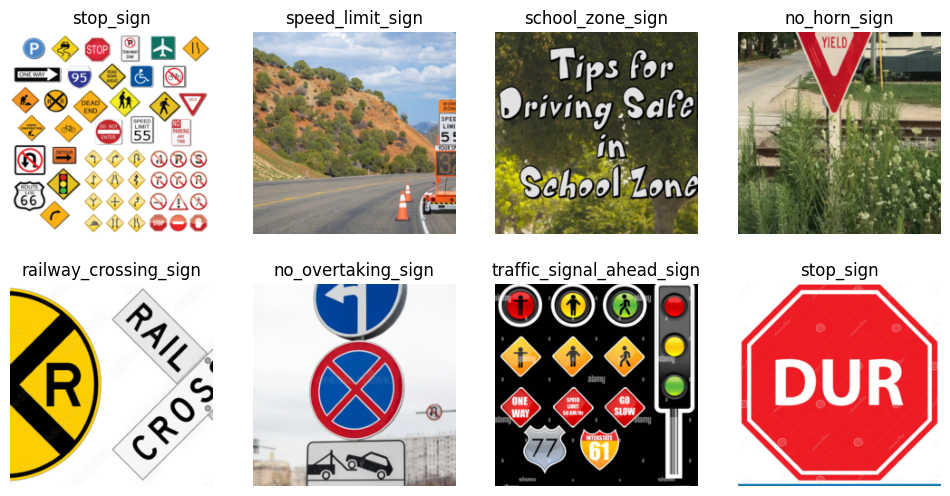

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

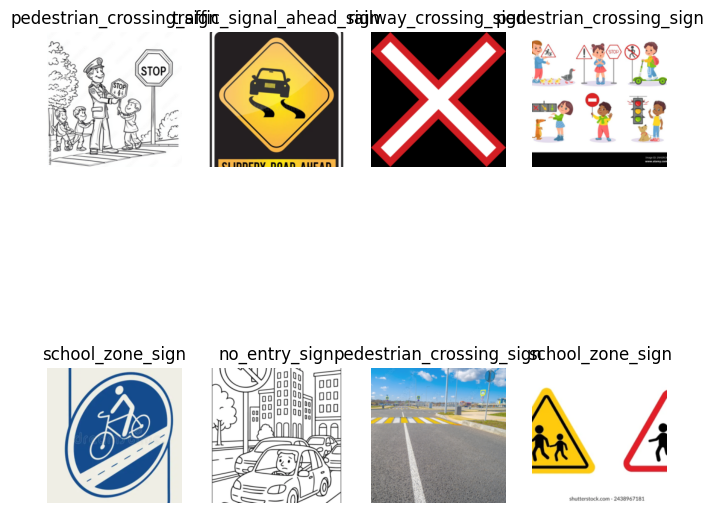

In [ ]:
dls.show_batch(max_n=16, figsize=(8,8))


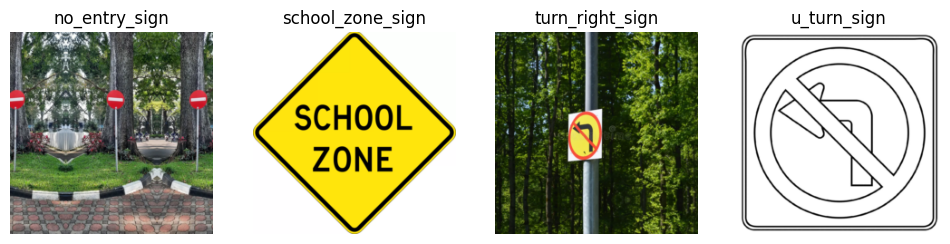

In [ ]:
dblock = dblock.new(item_tfms=Resize(224, ResizeMethod.Pad))
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)